In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpatches
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("dataset/Crop_recommendation.csv")
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [4]:
data.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data=data.dropna(axis=1)

In [7]:
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
data.corr()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

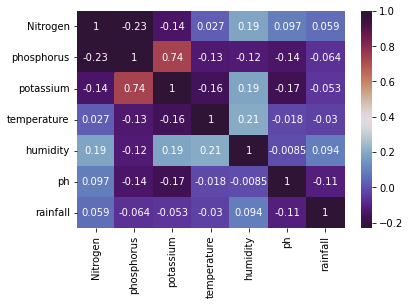

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='twilight_shifted')

In [10]:
data.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


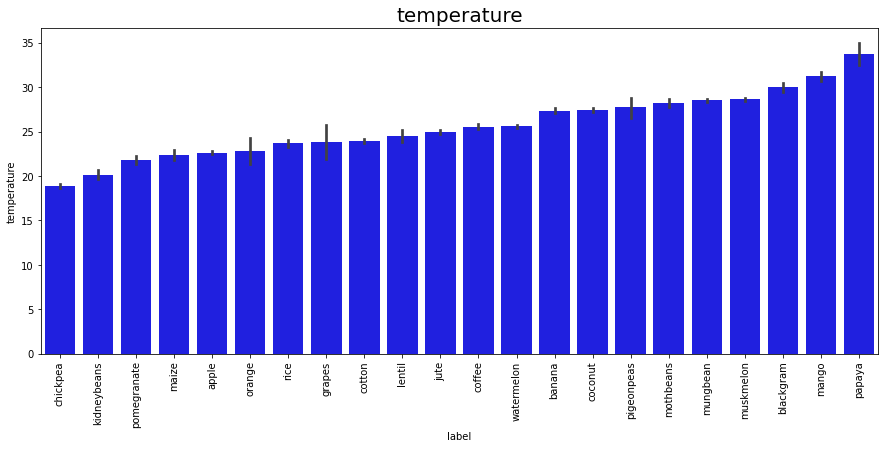

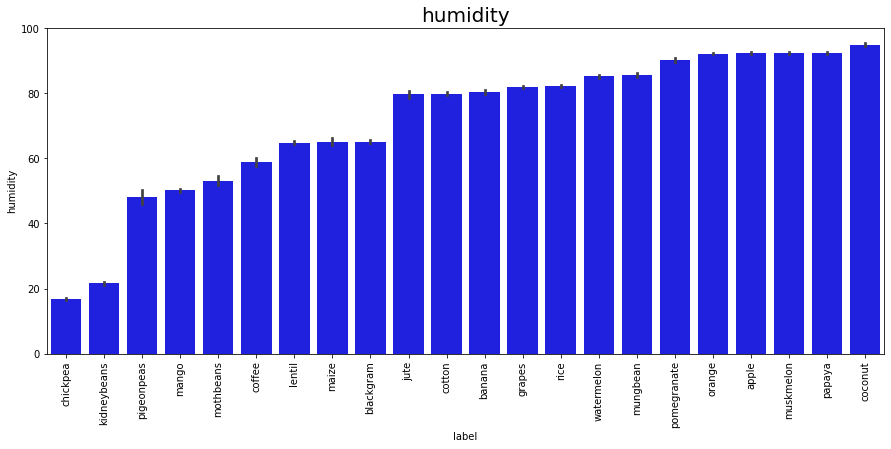

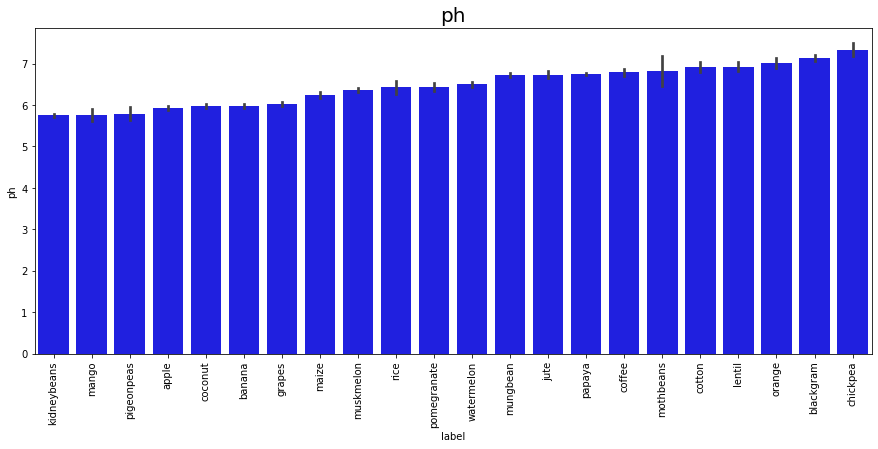

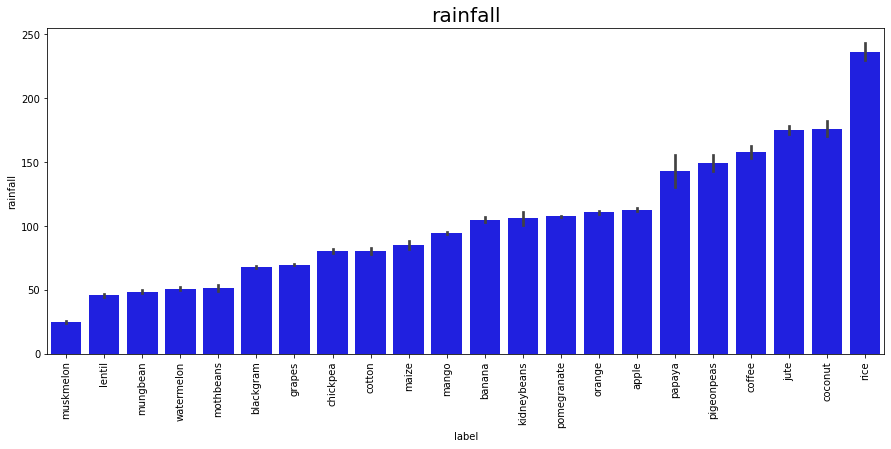

In [11]:
cols=[ 'temperature', 'humidity', 'ph', 'rainfall']
for col in cols:
    plt.figure(figsize=(15,6))
    plt.title(col,fontsize=20)
    df = data.groupby('label').agg({col:np.sum}).reset_index().sort_values([col])
    g = sns.barplot(x=data['label'],y=data[col],color="blue",data=data,order= df.label.values)
    g.tick_params(axis='x', labelrotation=90)
    g.tick_params(axis='y')
    plt.show()

In [12]:
data.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [13]:
data['label'].value_counts()

jute           100
coffee         100
pigeonpeas     100
mungbean       100
grapes         100
rice           100
kidneybeans    100
watermelon     100
banana         100
maize          100
apple          100
orange         100
papaya         100
muskmelon      100
mothbeans      100
blackgram      100
cotton         100
chickpea       100
lentil         100
mango          100
coconut        100
pomegranate    100
Name: label, dtype: int64

In [14]:
#one_hot=pd.get_dummies(df['label'])
#df_encoded = pd.concat([df, one_hot], axis=1)
#df_encoded.drop(columns=['label'], inplace=True)
#print(df_encoded)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
label_encoder.fit(data['label'])

LabelEncoder()

In [17]:
encoded_col = label_encoder.transform(data['label'])

In [18]:
print(encoded_col)

[20 20 20 ...  5  5  5]


In [19]:
value = label_encoder.inverse_transform(encoded_col)
print("result of Decision Tree:",value)

result of Decision Tree: ['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']


In [20]:
data['label'] = encoded_col

In [21]:
data['label']

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [22]:
#original_colors = label_encoder.inverse_transform(encoded_colors)
#print(original_colors)

In [23]:
data.head(1500)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
1495,96,13,55,29.527531,94.574594,6.700338,21.135457,15
1496,82,26,47,28.504164,93.468065,6.565313,24.200072,15
1497,106,21,52,28.895786,94.789930,6.286515,23.036250,15
1498,90,15,52,27.049275,91.382173,6.448062,23.657475,15


In [24]:
data.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int32
dtype: object

In [25]:
X = data[['temperature','humidity','ph','rainfall']]

In [26]:
X

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034
4,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507
2196,27.417112,56.636362,6.086922,127.924610
2197,24.131797,67.225123,6.362608,173.322839
2198,26.272418,52.127394,6.758793,127.175293


In [27]:
y = data['label']

In [28]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 42)

In [30]:
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (1760, 4)
train size y :  (1760,)
test size X :  (440, 4)
test size y :  (440,)


In [31]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [32]:
print(X_train.shape)
print(X_test.shape)

(1760, 4)
(440, 4)


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
y_pred11=dt.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
accuracy = accuracy_score(y_test, y_pred11)
print('Accuracy for the DT is ', accuracy*100,'%')

Accuracy for the DT is  93.18181818181817 %


In [38]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [39]:
y_pred=model.predict(X_test)

In [40]:
#y_pred = label_encoder.inverse_transform(y_pred)
#print("result of Decision Tree:",y_pred)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [42]:
knc_pred=clf.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, knc_pred)
print('Accuracy for the DT is ', accuracy*100,'%')

Accuracy for the DT is  84.77272727272728 %


In [44]:
y_pred1=clf.predict(X_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier 
Random= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
Random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [46]:
y_pred2=Random.predict(X_test)

# logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression


In [49]:
# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy logistic regression: {accuracy*100}")

Accuracy logistic regression: 58.18181818181818


In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for the DT is ', accuracy*100,'%')

Accuracy for the DT is  95.9090909090909 %


In [48]:
accuracy1 = accuracy_score(y_test, y_pred1)
print('Accuracy for the KNN is ', accuracy1*100,'%')

Accuracy for the KNN is  84.77272727272728 %


In [49]:
accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy for the Random is ', accuracy2*100,'%')

Accuracy for the Random is  94.77272727272728 %


In [50]:
temperature = float(input("Enter temperature: "))
humidity = float(input("Enter humidity: "))
ph = float(input("Enter pH: "))
rainfall = float(input("Enter rainfall: "))

Enter temperature: 25
Enter humidity: 81
Enter pH: 6.5
Enter rainfall: 202


In [51]:
input_data = pd.DataFrame({
    'Temperature': [temperature],
    'Humidity': [humidity],
    'pH': [ph],
    'Rainfall': [rainfall]
})

In [52]:
type(input_data)

#predicted_crop =classifier.(input_data)

pandas.core.frame.DataFrame

In [53]:
input_data

,Temperature,Humidity,pH,Rainfall
0,25.0,81.0,6.5,202.0


In [61]:
records = input_data.values[:,0:4]
print("===>",records)
value = Random.predict(records)
print("result of Random Tree:" +str(value))

===> [[ 25.   81.    6.5 202. ]]
result of Random Tree:[20]


In [55]:
value = label_encoder.inverse_transform(value)
print("result of Decision Tree:",value)

result of Decision Tree: ['rice']


In [56]:
value1 = clf.predict(records)
print("result of KNN: "+str(value1))

result of KNN: [20]


In [57]:
value1 = label_encoder.inverse_transform(value1)
print("result of KNN:",value1)

result of KNN: ['rice']


In [58]:
value2 = Random.predict(records)
print("result of Random:"+str(value2))

result of Random:[20]


In [59]:
value2= label_encoder.inverse_transform(value2)
print("result of Random:",value2)

result of Random: ['rice']


In [60]:
cm=confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

0.9590909090909091

In [64]:
"""X_train = train[['temperature', 'humidity', 'ph','rainfall']].values
X_test = test[['temperature', 'humidity', 'ph','rainfall']].values"""

"X_train = train[['temperature', 'humidity', 'ph','rainfall']].values\nX_test = test[['temperature', 'humidity', 'ph','rainfall']].values"

In [65]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
x_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
x_train
y_train

1656    16
752      2
892     10
1041     1
1179    12
        ..
1638    16
1095     1
1130    12
1294     7
860     10
Name: label, Length: 1760, dtype: int32

In [66]:
"""ytest"""

'ytest'

In [67]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=6)

In [68]:
"""multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)"""

'multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)\nmulti_target_decision.fit(x_train, y_train)'

###### y_pred= multi_target_decision.predict(X_test)
print(y_pred)

In [76]:
l=[]
for i in range(4):
    x= float(input('enter values'))
    l.append(x)

enter values21
enter values12
enter values21
enter values21


## 20.87974371	82.00274423	6.502985292	202.9355362

print(l)
data_array=np.array(l).reshape(1, -1)
y_pred1= multi_target_decision.predict(data_array)

In [77]:
type(data_array)

NameError: name 'data_array' is not defined

In [73]:
#y_pred2= multi_target_decision.predict(y_pred1)
#y_pred2

In [74]:
"""from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(ytest.argmax(axis=1), y_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(ytest.argmax(axis=1), y_pred.argmax(axis=1), digits=3))"""

'from sklearn import metrics\n# Print the confusion matrix\nprint(metrics.confusion_matrix(ytest.argmax(axis=1), y_pred.argmax(axis=1)))\n\n# Print the precision and recall, among other metrics\nprint(metrics.classification_report(ytest.argmax(axis=1), y_pred.argmax(axis=1), digits=3))'

In [75]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

NameError: name 'ytest' is not defined

In [ ]:
failed_index_DT = ytest.argmax(axis=1) !=  y_pred.argmax(axis=1)
failed_index_DT

In [ ]:
sum(failed_index_DT)

In [ ]:
test['label'].values[failed_index_DT]

In [ ]:
size=len(failed_index_DT)

In [ ]:
print(size)

In [ ]:
arr=np.array(failed_index_DT)
bin_arr = np.bincount(arr)
count = bin_arr[0]
print("no.of zeros in array:",count)

In [ ]:
df_results = pd.DataFrame({'DT':failed_index_DT})

In [ ]:
df_results.head()

In [38]:
df_results.sum()

DT    71
dtype: int64

In [39]:
Failed = df_results.sum(axis = 1)

In [40]:
Selected = Failed[Failed!=0].sort_values()

In [41]:
test['label'].values[list(Selected.index)]

array(['orange', 'papaya', 'maize', 'lentil', 'papaya', 'mungbean',
       'orange', 'pigeonpeas', 'papaya', 'mungbean', 'mungbean', 'grapes',
       'papaya', 'rice', 'jute', 'pigeonpeas', 'pomegranate', 'mothbeans',
       'pomegranate', 'rice', 'pomegranate', 'banana', 'pomegranate',
       'mothbeans', 'pigeonpeas', 'coffee', 'pomegranate', 'papaya',
       'papaya', 'pomegranate', 'jute', 'maize', 'papaya', 'orange',
       'coffee', 'cotton', 'maize', 'coffee', 'rice', 'mothbeans',
       'pomegranate', 'mothbeans', 'pigeonpeas', 'cotton', 'mothbeans',
       'pomegranate', 'pigeonpeas', 'mothbeans', 'rice', 'papaya',
       'pomegranate', 'grapes', 'mungbean', 'orange', 'pigeonpeas',
       'coconut', 'maize', 'pigeonpeas', 'papaya', 'papaya', 'rice',
       'cotton', 'pomegranate', 'jute', 'pomegranate', 'pigeonpeas',
       'papaya', 'grapes', 'orange', 'pigeonpeas', 'cotton'], dtype=object)

In [42]:
print(test['label'].values[failed_index_DT])

['orange' 'pomegranate' 'papaya' 'rice' 'mothbeans' 'pigeonpeas'
 'pomegranate' 'grapes' 'mothbeans' 'pigeonpeas' 'mothbeans' 'pomegranate'
 'mothbeans' 'rice' 'coffee' 'cotton' 'orange' 'cotton' 'pigeonpeas'
 'orange' 'grapes' 'papaya' 'pigeonpeas' 'pomegranate' 'jute' 'pigeonpeas'
 'pomegranate' 'rice' 'papaya' 'papaya' 'pigeonpeas' 'maize' 'coconut'
 'maize' 'mungbean' 'cotton' 'pomegranate' 'jute' 'rice' 'papaya' 'grapes'
 'mungbean' 'mungbean' 'pigeonpeas' 'papaya' 'orange' 'mungbean' 'papaya'
 'lentil' 'maize' 'papaya' 'pigeonpeas' 'mothbeans' 'coffee' 'pomegranate'
 'papaya' 'maize' 'jute' 'pomegranate' 'papaya' 'papaya' 'orange'
 'pomegranate' 'pigeonpeas' 'mothbeans' 'pomegranate' 'banana'
 'pomegranate' 'rice' 'coffee' 'cotton']


In [43]:
df_Mismatch = df_results[Failed !=0]
df_Mismatch

,DT
12,True
26,True
29,True
31,True
33,True
...,...
417,True
420,True
425,True
428,True


In [44]:

Df_NonMatched = df_Mismatch.sum(axis = 1)

In [45]:
df_results_Failed = pd.DataFrame({'Failed':Df_NonMatched})
df_results_Failed['others']=test['label'].values[df_Mismatch.index.values]

In [46]:
df_results_Failed.head(50)

,Failed,others
12,1,orange
26,1,pomegranate
29,1,papaya
31,1,rice
33,1,mothbeans
37,1,pigeonpeas
56,1,pomegranate
71,1,grapes
73,1,mothbeans
74,1,pigeonpeas


In [47]:
ls_Models=[('multi_target_decision', multi_target_decision)]

In [48]:
Y_all = []
ycolumnname = []
for str_model in ls_Models:
    ycolumnname.append(str_model[0])
    Y_all.append(str_model[1].predict(X_test))

In [49]:
Y_all[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=uint8)

In [50]:
YY = np.array(Y_all)

In [51]:
TT =YY.argmax(axis  =2).T

In [52]:
DF_combined = pd.DataFrame(TT,columns=ycolumnname)

In [53]:
DF_combined

,multi_target_decision
0,20
1,11
2,7
3,15
4,7
...,...
435,14
436,2
437,7
438,0


In [54]:
DF_combined.median(axis = 1).value_counts()

0.0     63
8.0     25
3.0     24
14.0    24
21.0    23
5.0     22
12.0    22
11.0    21
10.0    19
20.0    18
1.0     18
2.0     18
15.0    17
4.0     17
19.0    17
9.0     17
6.0     15
7.0     14
16.0    13
17.0    11
18.0    11
13.0    11
dtype: int64

In [55]:
sum(ytest.argmax(axis =1) != DF_combined.median(axis = 1))

71

In [3]:
# Sample input values (you can get these from the user interface)
rainfall = int(input("enter rainfall: "))# 120  # in mm
temperature = int(input("enter temperature: ")) #28  # in Celsius
moisture = int(input("enter moisture: "))#85  # in percentage
humidity = int(input("enter humidity: "))#70  # in percentage

def crop_recommendation(rainfall, temperature, moisture, humidity):
    if rainfall > 100 and temperature > 25:
        return "Rice or Tropical Fruits"
    elif 50 <= rainfall <= 100 and 20 <= temperature <= 25:
        return "Wheat or Barley"
    elif moisture > 80 and humidity > 80:
        return "Corn or Sugarcane"
    elif moisture < 30 and humidity < 30:
        return "Cactus or Millets"
    else:
        return "Crop recommendation not available for given conditions."

# Get crop recommendation based on the input values
recommendation = crop_recommendation(rainfall, temperature, moisture, humidity)
print("Recommended crops:", recommendation)


enter rainfall: 28
enter temperature: 27
enter moisture: 83
enter humidity: 86
Recommended crops: Corn or Sugarcane


In [4]:
def crop_recommendation(rainfall, temperature, moisture, humidity):
    # Define crop ranges based on conditions (These ranges need to be fine-tuned)
    crops = {
        'Rice': {'rainfall': (100, 200), 'temperature': (20, 35), 'moisture': (30, 60), 'humidity': (50, 90)},
        'Wheat': {'rainfall': (50, 100), 'temperature': (15, 30), 'moisture': (20, 40), 'humidity': (40, 80)},
        'Maize': {'rainfall': (50, 100), 'temperature': (20, 35), 'moisture': (40, 70), 'humidity': (60, 90)},
        # Add more crops and their corresponding conditions here
    }

    recommended_crops = []

    for crop, conditions in crops.items():
        if (
            conditions['rainfall'][0] <= rainfall <= conditions['rainfall'][1] and
            conditions['temperature'][0] <= temperature <= conditions['temperature'][1] and
            conditions['moisture'][0] <= moisture <= conditions['moisture'][1] and
            conditions['humidity'][0] <= humidity <= conditions['humidity'][1]
        ):
            recommended_crops.append(crop)

    return recommended_crops

# User input
rainfall = float(input("Enter the field's rainfall (mm): "))
temperature = float(input("Enter the field's temperature (Celsius): "))
moisture = float(input("Enter the field's moisture (%): "))
humidity = float(input("Enter the field's humidity (%): "))

recommendations = crop_recommendation(rainfall, temperature, moisture, humidity)

if recommendations:
    print("Recommended crops for the given conditions:", recommendations)
else:
    print("No crops found for the given conditions. Adjust the factors and try again.")


Enter the field's rainfall (mm): 28
Enter the field's temperature (Celsius): 27
Enter the field's moisture (%): 83
Enter the field's humidity (%): 86
No crops found for the given conditions. Adjust the factors and try again.
